In [136]:
# Functional imports
import os 
import numpy as np

import nibabel as nib
from brainiak import image, isc
from nilearn import masking, plotting, datasets
from nilearn import image as niimage

import data_prep_helpers as helpers
from plotting_helpers import plot_lateral_only, plot_lateral_only_with_vmax

# Notebook specific imports
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
%autosave 5

Autosaving every 5 seconds


<h2>Setup</h2>

In [137]:
# Set data location
directory = os.path.join(os.path.expanduser('~'), 'Documents', 'Data')
group_mask = nib.load(os.path.join(directory, 'group_mask.nii.gz'))
print('Mask shape:', np.shape(group_mask))

Mask shape: (79, 95, 68)


<h3>Generate adult average</h3>

In [7]:
# Load adult BOLD data
bold_adults = helpers.load_clean_data(subject_range=range(123,156), 
                                      directory=os.path.join(directory, 'adults', 'raw_subjects'))
print('Adult data:', np.shape(bold_adults))

Adult data: (33,)


In [8]:
# Calculate adult average
adult_data = []

for subject in bold_adults:
    adult_data.append(subject.get_fdata())

avg_adults = nib.Nifti1Image(np.mean(adult_data, axis=0), 
                            affine=group_mask.affine, 
                            header=group_mask.header)
print('Adult average:', np.shape(avg_adults))

Adult average: (79, 95, 68, 168)


In [9]:
avg_adults.to_filename(os.path.join(directory, 'adults', 'adults_isc_avg.nii.gz'))

<h3>Load existing adult average</h3>

In [4]:
avg_adults = nib.load(os.path.join(directory, 'adults', 'adults_isc_avg.nii.gz'))
print('Adult average:', np.shape(avg_adults))

Adult average: (79, 95, 68, 168)


<h3>Load child BOLD data</h3>

In [5]:
# Load 3-4 year old BOLD data
bold_34yrs = helpers.load_clean_data(subject_range=range(1,32), 
                                    directory=os.path.join(directory, '3-4-yrs', 'raw_subjects'))
print('3-4 year old data:', np.shape(bold_34yrs))

3-4 year old data: (31,)


In [5]:
# Load 5 year old BOLD data
bold_5yrs = helpers.load_clean_data(subject_range=range(32,66), 
                                    directory=os.path.join(directory, '5-yrs', 'raw_subjects'))
print('5 year old data:', np.shape(bold_5yrs))

5 year old data: (34,)


In [5]:
# Load 7 year old BOLD data
ids_7yrs = [66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 83, 84, 86, 88, 96, 99, 114, 116, 122]
bold_7yrs = helpers.load_clean_data(subject_range=ids_7yrs, 
                                    directory=os.path.join(directory, '7-yrs', 'raw_subjects'))
print('7 year old data:', np.shape(bold_7yrs))

7 year old data: (23,)


In [5]:
# Load 8-12 year old BOLD data
ids_812yrs = [77, 78, 82, 85, 87, 89, 90, 91, 92, 93, 94, 95, 97, 98, 100, 101, 102, 103, 
               104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117, 118, 119, 120, 121]
bold_812yrs = helpers.load_clean_data(subject_range=ids_812yrs, 
                                    directory=os.path.join(directory, '8-12-yrs', 'raw_subjects'))
print('812 year old data:', np.shape(bold_812yrs))

812 year old data: (34,)


<h2>Neural maturity measure</h2>

In [7]:
# 3-4 year olds

isc_34yrs_comparison = helpers.cross_group_isc(bold_data=bold_34yrs, avg_adults=avg_adults, mask=group_mask)
print('3-4 year old ISC results:', np.shape(isc_34yrs_comparison))

np.save(os.path.join(directory, '3-4-yrs', '3-4-yrs_comparison_isc.npy'), isc_34yrs_comparison)

3-4 year old ISC results: (31, 377996)


In [6]:
# 5 year olds

isc_5yrs_comparison = helpers.cross_group_isc(bold_data=bold_5yrs, avg_adults=avg_adults, mask=group_mask)
np.save(os.path.join(directory, '5-yrs', '5-yrs_comparison_isc.npy'), isc_5yrs_comparison)
print('5 year old ISC results:', np.shape(isc_5yrs_comparison))


5 year old ISC results: (34, 377996)


In [7]:
# 7 year olds

isc_7yrs_comparison = helpers.cross_group_isc(bold_data=bold_7yrs, avg_adults=avg_adults, mask=group_mask)
np.save(os.path.join(directory, '7-yrs', '7-yrs_comparison_isc.npy'), isc_7yrs_comparison)
print('7 year old ISC results:', np.shape(isc_7yrs_comparison))


7 year old ISC results: (23, 377996)


In [6]:
# 8-12 year olds

isc_812yrs_comparison = helpers.cross_group_isc(bold_data=bold_812yrs, avg_adults=avg_adults, mask=group_mask)
np.save(os.path.join(directory, '8-12-yrs', '8-12-yrs_comparison_isc.npy'), isc_812yrs_comparison)
print('8-12 year old ISC results:', np.shape(isc_812yrs_comparison))


8-12 year old ISC results: (34, 377996)


<h2>Load thresholded ISC maps</h2>

<h3>Within-group ISC</h3>

In [139]:
within_group_adults = np.squeeze(np.load(os.path.join(directory, 'adults', 'adults_isc_thresholded.npy')))
print('Adults within group:', np.shape(within_group_adults))

within_group_34yrs = np.squeeze(np.load(os.path.join(directory, '3-4-yrs', '3-4-yrs_isc_thresholded.npy')))
print('3-5 year olds within group:', np.shape(within_group_34yrs))

within_group_5yrs = np.squeeze(np.load(os.path.join(directory, '5-yrs', '5-yrs_isc_thresholded.npy')))
print('5 year olds within group:', np.shape(within_group_5yrs))

within_group_7yrs = np.squeeze(np.load(os.path.join(directory, '7-yrs', '7-yrs_isc_thresholded.npy')))
print('7 year olds within group:', np.shape(within_group_7yrs))

within_group_812yrs = np.squeeze(np.load(os.path.join(directory, '8-12-yrs', '8-12-yrs_isc_thresholded.npy')))
print('8-12 year olds within group:', np.shape(within_group_812yrs))

Adults within group: (377996,)
3-5 year olds within group: (377996,)
5 year olds within group: (377996,)
7 year olds within group: (377996,)
8-12 year olds within group: (377996,)


<h3>Comparison ISC</h3>

In [141]:
comparison_34yrs = np.squeeze(np.load(os.path.join(directory, '3-4-yrs', '3-4-yrs_isc_comparison_thresholded.npy')))
print('3-4 year olds comparison:', np.shape(comparison_34yrs))

comparison_5yrs = np.squeeze(np.load(os.path.join(directory, '5-yrs', '5-yrs_isc_comparison_thresholded.npy')))
print('5 year olds comparison:', np.shape(comparison_5yrs))

comparison_7yrs = np.squeeze(np.load(os.path.join(directory, '7-yrs', '7-yrs_isc_comparison_thresholded.npy')))
print('7 year olds comparison:', np.shape(comparison_7yrs))

comparison_812yrs = np.squeeze(np.load(os.path.join(directory, '8-12-yrs', '8-12-yrs_isc_comparison_thresholded.npy')))
print('8-12 year olds comparison:', np.shape(comparison_812yrs))


3-4 year olds comparison: (377996,)
5 year olds comparison: (377996,)
7 year olds comparison: (377996,)
8-12 year olds comparison: (377996,)


<h2>Plot volumes</h2>

<h3>3-4 years</h3>

107764/377996 significant voxels within group: 0.29
57091/377996 significant voxels compared to adults: 0.15


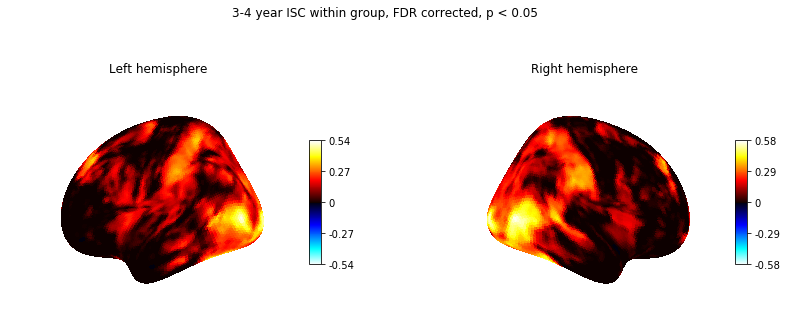

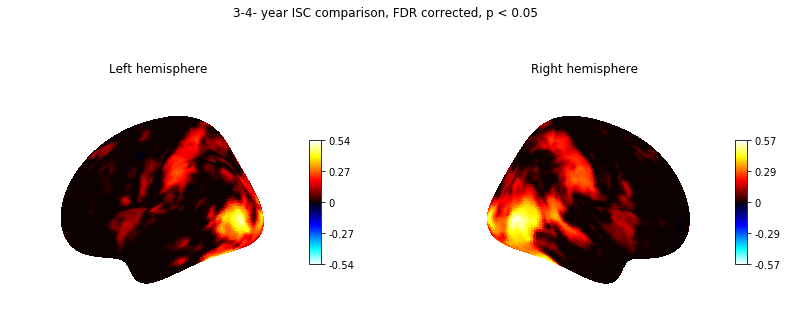

In [151]:
print(f'107764/377996 significant voxels within group: {(107764/377996):.2f}')
print(f'57091/377996 significant voxels compared to adults: {(57091/377996):.2f}')

plot_lateral_only(vol=helpers.make_vol(within_group_34yrs, group_mask), 
                  title='3-4 year ISC within group, FDR corrected, p < 0.05', 
                  vis_threshold=0)
plot_lateral_only(vol=helpers.make_vol(comparison_34yrs, group_mask), 
                  title='3-4- year ISC comparison, FDR corrected, p < 0.05', 
                  vis_threshold=0)


<h3>5 years</h3>

173395/377996 significant voxels within group: 0.46
114655/377996 significant voxels compared to adults: 0.30


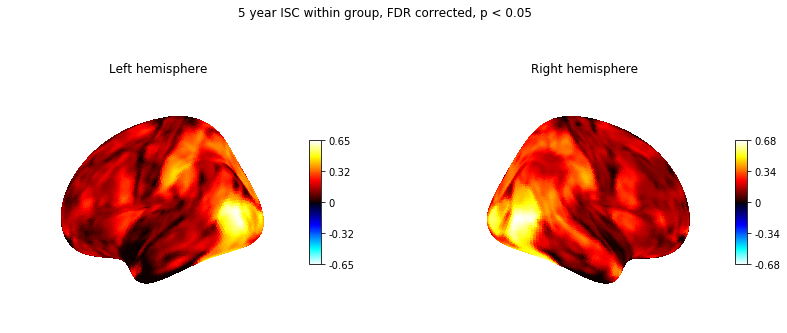

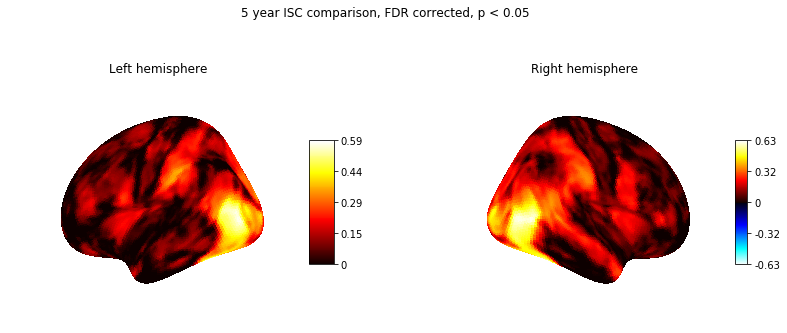

In [150]:
print(f'173395/377996 significant voxels within group: {(173395/377996):.2f}')
print(f'114655/377996 significant voxels compared to adults: {(114655/377996 ):.2f}')

plot_lateral_only(vol=helpers.make_vol(within_group_5yrs, group_mask), 
                  title='5 year ISC within group, FDR corrected, p < 0.05', 
                  vis_threshold=0)

plot_lateral_only(vol=helpers.make_vol(comparison_5yrs, group_mask), 
                  title='5 year ISC comparison, FDR corrected, p < 0.05', 
                  vis_threshold=0)


<h3>7 years</h3>

110970/377996 significant voxels within group  0.29
95740/377996 significant voxels compared to adults  0.25


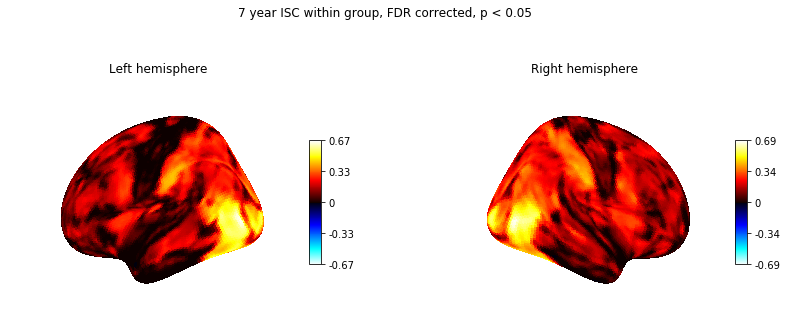

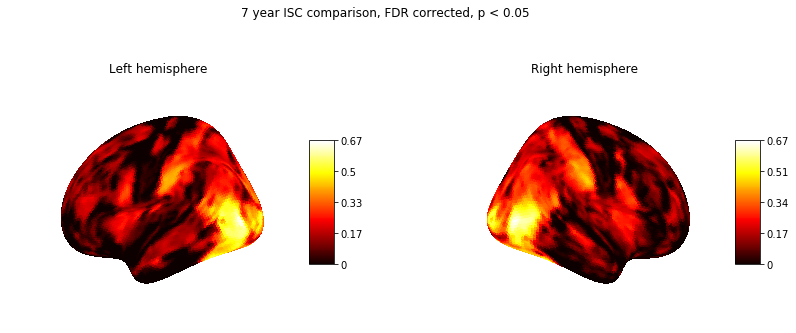

In [152]:
print(f'110970/377996 significant voxels within group  {(110970/377996):.2f}')
print(f'95740/377996 significant voxels compared to adults  {(95740/377996):.2f}')

plot_lateral_only(vol=helpers.make_vol(within_group_7yrs, group_mask), 
                  title='7 year ISC within group, FDR corrected, p < 0.05', 
                  vis_threshold=0)

plot_lateral_only(vol=helpers.make_vol(comparison_7yrs, group_mask), 
                  title='7 year ISC comparison, FDR corrected, p < 0.05', 
                  vis_threshold=0)


<h3>8-12 years</h3>

157088/377996 significant voxels within group  0.42
135323/377996 significant voxels compared to adults  0.36


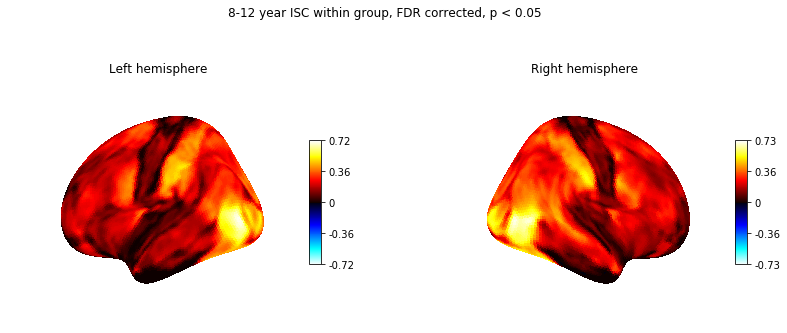

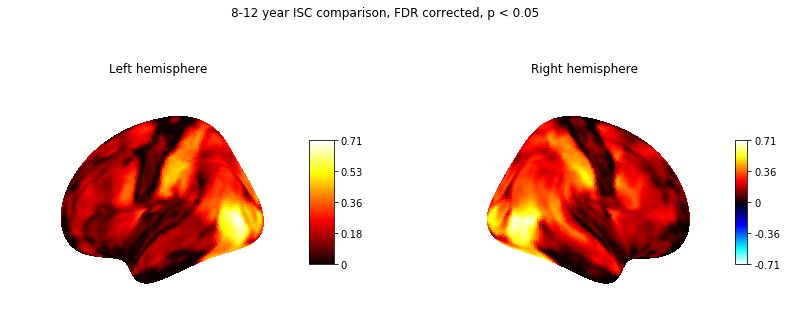

In [153]:
print(f'157088/377996 significant voxels within group  {(157088/377996):.2f}')
print(f'135323/377996 significant voxels compared to adults  {(135323/377996):.2f}')

plot_lateral_only(vol=helpers.make_vol(within_group_812yrs, group_mask), 
                  title='8-12 year ISC within group, FDR corrected, p < 0.05', 
                  vis_threshold=0)

plot_lateral_only(vol=helpers.make_vol(comparison_812yrs, group_mask), 
                  title='8-12 year ISC comparison, FDR corrected, p < 0.05', 
                  vis_threshold=0)

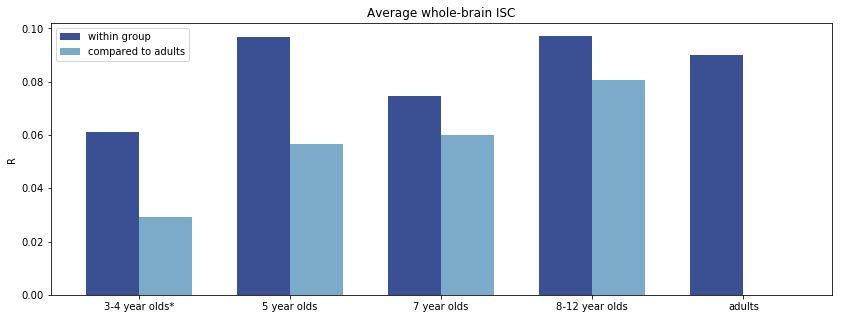

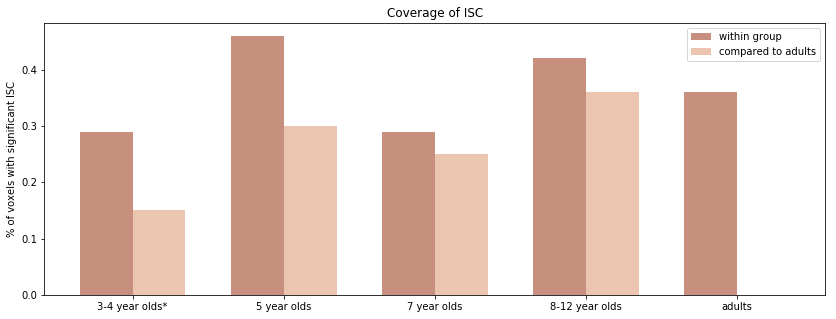

In [179]:
import matplotlib.pyplot as plt

N = 5
within_group = np.array((within_group_avg_34yrs, 
                        within_group_avg_5yrs, 
                        within_group_avg_7yrs, 
                        within_group_avg_812yrs,
                        within_group_avg_adults))
comparison = np.array((comparison_avg_34yrs, 
                       comparison_avg_5yrs, 
                       comparison_avg_7yrs, 
                       comparison_avg_812yrs, 
                       0))

plt.figure(figsize=(14, 5))

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, within_group, width, label='within group', color='#3B5093')
plt.bar(ind + width, comparison, width, label='compared to adults', color='#7CAACA')

plt.ylabel('R')
plt.title('Average whole-brain ISC')

plt.xticks(ind + width / 2, ('3-4 year olds*', '5 year olds', '7 year olds', '8-12 year olds', 'adults'))
plt.legend(loc='best')
plt.show()

within_group_voxels = np.array((0.29, 0.46, 0.29, 0.42, 0.36))
cross_group_voxels = np.array((0.15, 0.30, 0.25, 0.36, 0))

plt.figure(figsize=(14, 5))  
plt.bar(ind, within_group_voxels, width, label='within group', color='#C7907E')
plt.bar(ind + width, cross_group_voxels, width, label='compared to adults', color='#EBC5B0')


plt.ylabel('% of voxels with significant ISC')
plt.title('Coverage of ISC')

plt.xticks(ind + width / 2, ('3-4 year olds*', '5 year olds', '7 year olds', '8-12 year olds', 'adults'))
plt.legend(loc='best')
plt.show()

<h2>Comparing Averages</h2>

<h3>Load unthresholded results</h3>

In [171]:
within_group_adults = np.nanmean(np.load(os.path.join(directory, 'adults', 'adults_isc.npy')), axis=1)
print('Adults within group:', np.shape(within_group_adults))

within_group_34yrs = np.nanmean(np.load(os.path.join(directory, '3-4-yrs', '3-4-yrs_isc.npy')), axis=1)
print('3-5 year olds within group:', np.shape(within_group_34yrs))

within_group_5yrs = np.nanmean(np.load(os.path.join(directory, '5-yrs', '5-yrs_isc.npy')), axis=1)
print('5 year olds within group:', np.shape(within_group_5yrs))

within_group_7yrs = np.nanmean(np.load(os.path.join(directory, '7-yrs', '7-yrs_isc.npy')), axis=1)
print('7 year olds within group:', np.shape(within_group_7yrs))

within_group_812yrs = np.nanmean(np.load(os.path.join(directory, '8-12-yrs', '8-12-yrs_isc.npy')), axis=1)
print('8-12 year olds within group:', np.shape(within_group_812yrs))

Adults within group: (33,)
3-5 year olds within group: (31,)
5 year olds within group: (34,)
7 year olds within group: (23,)
8-12 year olds within group: (34,)


In [172]:
comparison_34yrs = np.nanmean(np.load(os.path.join(directory, '3-4-yrs', '3-4-yrs_isc_comparison.npy')), axis=1)
print('3-5 year olds comparison:', np.shape(comparison_34yrs))

comparison_5yrs = np.nanmean(np.load(os.path.join(directory, '5-yrs', '5-yrs_isc_comparison.npy')), axis=1)
print('5 year olds comparison:', np.shape(comparison_5yrs))

comparison_7yrs = np.nanmean(np.load(os.path.join(directory, '7-yrs', '7-yrs_isc_comparison.npy')), axis=1)
print('7 year olds comparison:', np.shape(comparison_7yrs))

comparison_812yrs = np.nanmean(np.load(os.path.join(directory, '8-12-yrs', '8-12-yrs_isc_comparison.npy')), axis=1)
print('8-12 year olds comparison:', np.shape(comparison_812yrs))

3-5 year olds comparison: (31,)
5 year olds comparison: (34,)
7 year olds comparison: (23,)
8-12 year olds comparison: (34,)


<h3>Plots</h3>

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_rel

In [181]:
dataframe = pd.DataFrame()

for subject in within_group_34yrs:
    row = {'Average R': [subject], 'Age group': ['3-4 yrs'], 'Reference group': ['within group']}
    dataframe = pd.concat([dataframe, pd.DataFrame(row)], ignore_index=True, axis=0)

for subject in comparison_34yrs:
    row = {'Average R': [subject], 'Age group': ['3-4 yrs'], 'Reference group': ['compared to adults']}
    dataframe = pd.concat([dataframe, pd.DataFrame(row)], ignore_index=True, axis=0)

for subject in within_group_5yrs:
    row = {'Average R': [subject], 'Age group': ['5 yrs'], 'Reference group': ['within group']}
    dataframe = pd.concat([dataframe, pd.DataFrame(row)], ignore_index=True, axis=0)

for subject in comparison_5yrs:
    row = {'Average R': [subject], 'Age group': ['5 yrs'], 'Reference group': ['compared to adults']}
    dataframe = pd.concat([dataframe, pd.DataFrame(row)], ignore_index=True, axis=0)

for subject in within_group_7yrs:
    row = {'Average R': [subject], 'Age group': ['7 yrs'], 'Reference group': ['within group']}
    dataframe = pd.concat([dataframe, pd.DataFrame(row)], ignore_index=True, axis=0)

for subject in comparison_7yrs:
    row = {'Average R': [subject], 'Age group': ['7 yrs'], 'Reference group': ['compared to adults']}
    dataframe = pd.concat([dataframe, pd.DataFrame(row)], ignore_index=True, axis=0)

for subject in within_group_812yrs:
    row = {'Average R': [subject], 'Age group': ['8-12 yrs'], 'Reference group': ['within group']}
    dataframe = pd.concat([dataframe, pd.DataFrame(row)], ignore_index=True, axis=0)

for subject in comparison_812yrs:
    row = {'Average R': [subject], 'Age group': ['8-12 yrs'], 'Reference group': ['compared to adults']}
    dataframe = pd.concat([dataframe, pd.DataFrame(row)], ignore_index=True, axis=0)

for subject in within_group_adults:
    row = {'Average R': [subject], 'Age group': ['adults'], 'Reference group': ['within group']}
    dataframe = pd.concat([dataframe, pd.DataFrame(row)], ignore_index=True, axis=0)


3-4 years:
within group r: 0.135
comparison r: 0.077
t: 6.485, p: 0.000000362
-
5 years:
within group r: 0.165
comparison r: 0.112
t: 12.461, p: 0.00000000000005
-
7 years:
within group r: 0.169
comparison r: 0.144
t: 4.995, p: 0.000053
-
8-12 years:
within group r: 0.177
comparison r: 0.153
t: 5.035, p: 0.000017
-


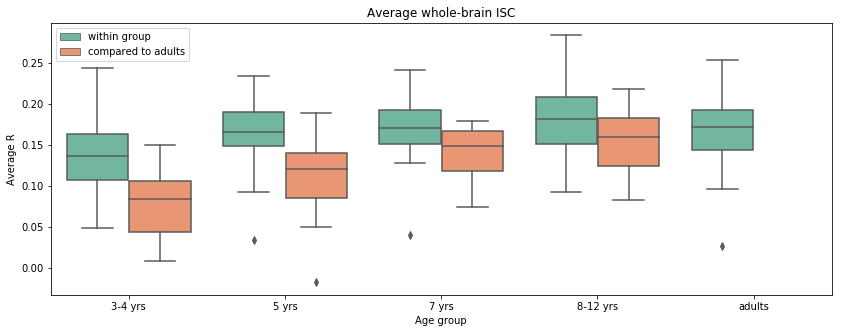

In [188]:
t_34yrs, p_34yrs = ttest_rel(a=within_group_34yrs,
                             b=comparison_34yrs)
print('3-4 years:')
print(f'within group r: {np.mean(within_group_34yrs):.3f}')
print(f'comparison r: {np.mean(comparison_34yrs):.3f}')
print(f't: {t_34yrs:.3f}, p: {p_34yrs:.9f}')
print('-')
t_5yrs, p_5yrs = ttest_rel(a=within_group_5yrs,
                           b=comparison_5yrs)
print('5 years:')
print(f'within group r: {np.mean(within_group_5yrs):.3f}')
print(f'comparison r: {np.mean(comparison_5yrs):.3f}')
print(f't: {t_5yrs:.3f}, p: {p_5yrs:.14f}')
print('-')

t_7yrs, p_7yrs = ttest_rel(a=within_group_7yrs,
                           b=comparison_7yrs)
print('7 years:')
print(f'within group r: {np.mean(within_group_7yrs):.3f}')
print(f'comparison r: {np.mean(comparison_7yrs):.3f}')
print(f't: {t_7yrs:.3f}, p: {p_7yrs:.6f}')
print('-')
t_812yrs, p_812yrs = ttest_rel(a=within_group_812yrs,
                             b=comparison_812yrs)
print('8-12 years:')
print(f'within group r: {np.mean(within_group_812yrs):.3f}')
print(f'comparison r: {np.mean(comparison_812yrs):.3f}')
print(f't: {t_812yrs:.3f}, p: {p_812yrs:.6f}')
print('-')

fig = plt.figure(figsize=(14,5))
plt.title('Average whole-brain ISC')
ax = sns.boxplot(x="Age group", y="Average R", hue="Reference group", data=dataframe, palette="Set2")
plt.legend(loc='upper left')
plt.show()